In [1]:
import torch
import pickle
import matplotlib.pyplot as plt

In [12]:
shp_origin_img=(100,100)
broken_image=torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding='latin1'))

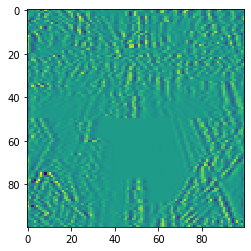

In [13]:
plt.imshow(broken_image.view(100,100))    # 무작위로 이미지를 오염시킴

In [14]:
def weird_function(x, n_iter=5): # 오염된 이미지를 만드는 함수
    h=x
    filt=torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l=torch.cat((zero_tensor, h[:-1]),0)
        h_r=torch.cat((h[1:], zero_tensor),0)
        h=filt[0]*h+filt[2]*h_l+filt[1]*h_r
        if i%2==0:
            h=torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
    return h

In [15]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [18]:
random_tensor = torch.randn(10000, dtype=torch.float)  # random_tensor의 shape : [1 x 10000]
#print(random_tensor.size())

torch.Size([10000])


Loss at 0 = 12.317231178283691
Loss at 1000 = 1.1683753728866577
Loss at 2000 = 0.5586571097373962
Loss at 3000 = 0.3867446184158325
Loss at 4000 = 0.3044612407684326
Loss at 5000 = 0.25433382391929626
Loss at 6000 = 0.21879331767559052
Loss at 7000 = 0.19082042574882507
Loss at 8000 = 0.1672137826681137
Loss at 9000 = 0.14635998010635376
Loss at 10000 = 0.12736234068870544
Loss at 11000 = 0.10967738926410675
Loss at 12000 = 0.09295353293418884
Loss at 13000 = 0.07695193588733673
Loss at 14000 = 0.06150578707456589
Loss at 15000 = 0.04649607837200165
Loss at 16000 = 0.03183828666806221
Loss at 17000 = 0.02114194631576538
Loss at 18000 = 0.021165193989872932
Loss at 19000 = 0.02116715908050537


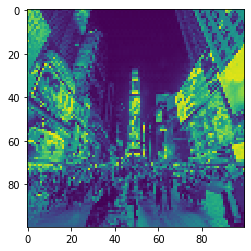

In [21]:
lr=0.8    # Learning Rate = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)                   # 손실함수 미분
    hypothesis=weird_function(random_tensor)            # 오염이미지 생성
    loss=distance_loss(hypothesis, broken_image)        # 오염이미지와 본래 이미지사이의 오차값
    loss.backward()                                     # loss를 random_tensor로 미분 (d(loss)/d(x))
    
    
    # 경사하강법을 함수를 사용하지않고, 직접 구현함
    with torch.no_grad():
        random_tensor=random_tensor-lr*random_tensor.grad       
        
        if i%1000==0:
            print('Loss at {} = {}'.format(i, loss.item()))
            
            
plt.imshow(random_tensor.view(100,100).data)
